# 1. Importing Libraries

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)


        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\misty\anaconda3\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [8]:
len(results.pose_landmarks.landmark)

33

In [9]:
results


mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame,results)

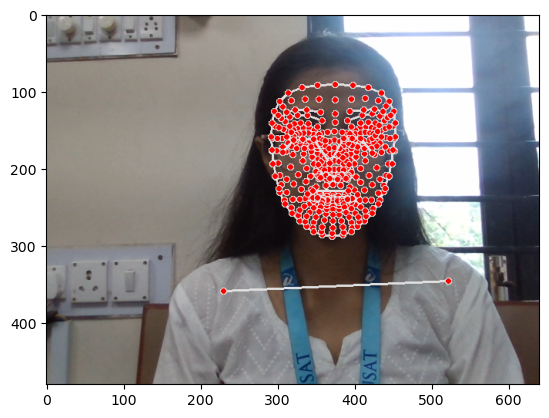

In [11]:
plt.imshow(cv2.cvtColor(frame ,cv2.COLOR_BGR2RGB))

In [11]:
len(results.face_landmarks.landmark)

468

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose

[array([ 0.64474267,  0.4465248 , -1.61482179,  0.99905372]),
 array([ 0.68642557,  0.35903832, -1.53089881,  0.99788839]),
 array([ 0.70871603,  0.36119568, -1.53098953,  0.99758202]),
 array([ 0.72994334,  0.36473942, -1.53107369,  0.99626988]),
 array([ 0.60682732,  0.35539517, -1.56995273,  0.99876481]),
 array([ 0.57949769,  0.3550089 , -1.56960797,  0.99909067]),
 array([ 0.55536026,  0.35678494, -1.57018805,  0.99917793]),
 array([ 0.76560879,  0.40382254, -0.97289622,  0.99561661]),
 array([ 0.52322978,  0.3979457 , -0.92563295,  0.99948764]),
 array([ 0.68671602,  0.54797244, -1.39717245,  0.99884492]),
 array([ 0.59702885,  0.54312968, -1.46194267,  0.99956727]),
 array([ 0.90072727,  0.78416538, -0.57570368,  0.97036898]),
 array([ 0.35105547,  0.79346025, -0.49433875,  0.99711746]),
 array([ 1.2020328 ,  1.04055822, -0.9249171 ,  0.27204368]),
 array([ 0.21867867,  1.31013846, -0.6020273 ,  0.65414804]),
 array([ 1.00489295,  0.917395  , -1.8630178 ,  0.22132091]),
 array([

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [15]:
len(pose)

132

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)
result_test

array([ 0.64474267,  0.4465248 , -1.61482179, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.64474267,  0.4465248 , -1.61482179, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                 # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(
                    DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()
##1:24:07 figure out way

cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(90, 30, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network 

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\misty\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - categorical_accuracy: 0.3737 - loss: 6.9905
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.3581 - loss: 27.4257
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3385 - loss: 13.7983
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.2799 - loss: 14.8483
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - categorical_accuracy: 0.3425 - loss: 21.3909
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.3131 - loss: 43.9329
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.4677 - loss: 16.6756
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.2838 - loss: 21.9757
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.3738 - loss: 38.6679
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - categorical_accuracy: 0.3659 - loss: 64.9179
Epoch 11/2000
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.3249 - loss: 24.3758
Epoch 124/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.3562 - loss: 35.6025
Epoch 125/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3757 - loss: 27.5146
Epoch 126/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.3757 - loss: 24.6547
Epoch 127/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.3327 - loss: 30.8827
Epoch 128/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.4892 - loss: 17.5107
Epoch 129/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 0.4403 - loss: 13.4689
Epoch 130/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.2779 - loss: 27.1721
Epoch 131/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.2466 - loss: 23.5286
Epoch 132/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.2877 - loss: 19.8389
Epoch 133/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.3718 - loss: 17.2726
Epoch 246/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - categorical_accuracy: 0.4011 - loss: 11.0171
Epoch 247/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.4892 - loss: 11.3028
Epoch 248/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.2701 - loss: 7.5488
Epoch 249/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 0.2759 - loss: 5.7356
Epoch 250/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - categorical_accuracy: 0.3425 - loss: 10.9222
Epoch 251/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.3131 - loss: 12.4347
Epoch 252/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3562 - loss: 7.8011
Epoch 253/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.4559 - loss: 5.7393
Epoch 254/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.5440 - loss: 3.5389
Epoch 255/2000
3/3 ━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.4756 - loss: 1.5724
Epoch 368/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.4285 - loss: 1.4832
Epoch 369/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4560 - loss: 1.9720
Epoch 370/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - categorical_accuracy: 0.5128 - loss: 2.0719
Epoch 371/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.5009 - loss: 2.0184
Epoch 372/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.5401 - loss: 1.6386
Epoch 373/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - categorical_accuracy: 0.4834 - loss: 1.4540
Epoch 374/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.5480 - loss: 1.2078
Epoch 375/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.6517 - loss: 1.3268
Epoch 376/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.6027 - loss: 1.7343
Epoch 377/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 0.6380 - loss: 0.8874
Epoch 490/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.5324 - loss: 1.0642
Epoch 491/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.6047 - loss: 1.1027
Epoch 492/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.5676 - loss: 0.7541
Epoch 493/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.6242 - loss: 0.9467
Epoch 494/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.5930 - loss: 0.9238
Epoch 495/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.6066 - loss: 0.8325
Epoch 496/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.6047 - loss: 0.9867
Epoch 497/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.5715 - loss: 0.8780
Epoch 498/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.6380 - loss: 0.7241
Epoch 499/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.5460 - loss: 1.0549
Epoch 612/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 0.6458 - loss: 1.3070
Epoch 613/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.6496 - loss: 1.4327
Epoch 614/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.6419 - loss: 1.5150
Epoch 615/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - categorical_accuracy: 0.5851 - loss: 1.3849
Epoch 616/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.6536 - loss: 1.0964
Epoch 617/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.6810 - loss: 1.1457
Epoch 618/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.5715 - loss: 1.1950
Epoch 619/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 0.5245 - loss: 1.5449
Epoch 620/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.5656 - loss: 1.0091
Epoch 621/2000
3/3 ━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 0.7006 - loss: 0.6493
Epoch 734/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.6614 - loss: 0.6322
Epoch 735/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.7318 - loss: 0.6140
Epoch 736/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.6888 - loss: 0.6242
Epoch 737/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.6673 - loss: 0.7081
Epoch 738/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.6457 - loss: 0.7243
Epoch 739/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.6204 - loss: 0.8126
Epoch 740/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.6379 - loss: 0.7383
Epoch 741/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.7123 - loss: 0.5878
Epoch 742/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.5891 - loss: 0.7123
Epoch 743/2000
3/3 ━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - categorical_accuracy: 0.6341 - loss: 0.6210
Epoch 856/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - categorical_accuracy: 0.7142 - loss: 0.5790
Epoch 857/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - categorical_accuracy: 0.6712 - loss: 0.5986
Epoch 858/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - categorical_accuracy: 0.6947 - loss: 0.6306
Epoch 859/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.6751 - loss: 0.5735
Epoch 860/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - categorical_accuracy: 0.7221 - loss: 0.5534
Epoch 861/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 0.6145 - loss: 0.6794
Epoch 862/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - categorical_accuracy: 0.6693 - loss: 0.6226
Epoch 863/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 0.7006 - loss: 0.5647
Epoch 864/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.6537 - loss: 0.5945
Epoch 865/2000
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 0.3581 - loss: 1.0946
Epoch 978/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.3347 - loss: 1.0954
Epoch 979/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.3464 - loss: 1.0964
Epoch 980/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.3425 - loss: 1.0958
Epoch 981/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.3386 - loss: 1.0968
Epoch 982/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.3151 - loss: 1.1038
Epoch 983/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.3347 - loss: 1.0985
Epoch 984/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.3268 - loss: 1.1001
Epoch 985/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.3151 - loss: 1.1022
Epoch 986/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.3307 - loss: 1.0977
Epoch 987/2000
3/3 ━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4285 - loss: 1.0900
Epoch 1100/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 0.3934 - loss: 1.0906
Epoch 1101/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.4051 - loss: 1.0903
Epoch 1102/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 0.3543 - loss: 1.0938
Epoch 1103/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.3973 - loss: 1.0893
Epoch 1104/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.3856 - loss: 1.0915
Epoch 1105/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4168 - loss: 1.0892
Epoch 1106/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4207 - loss: 1.0892
Epoch 1107/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.4012 - loss: 1.0907
Epoch 1108/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.3895 - loss: 1.0898
Epoch 1109/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3699 - loss: 1.0934
Epoch 1222/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4305 - loss: 1.0868
Epoch 1223/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.4188 - loss: 1.0876
Epoch 1224/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.3797 - loss: 1.0929
Epoch 1225/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4110 - loss: 1.0901
Epoch 1226/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3915 - loss: 1.0911
Epoch 1227/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.4227 - loss: 1.0871
Epoch 1228/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.3699 - loss: 1.0909
Epoch 1229/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.4090 - loss: 1.0881
Epoch 1230/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.3973 - loss: 1.0904
Epoch 1231/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.4520 - loss: 1.0855
Epoch 1344/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.4423 - loss: 1.0840
Epoch 1345/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.4208 - loss: 1.0854
Epoch 1346/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.4559 - loss: 1.0833
Epoch 1347/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.4520 - loss: 1.0863
Epoch 1348/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.3915 - loss: 1.0882
Epoch 1349/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.4091 - loss: 1.0888
Epoch 1350/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.4051 - loss: 1.0896
Epoch 1351/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4325 - loss: 1.0863
Epoch 1352/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.4208 - loss: 1.0872
Epoch 1353/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.4032 - loss: 1.0841
Epoch 1466/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.4383 - loss: 1.0808
Epoch 1467/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.4364 - loss: 1.0847
Epoch 1468/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.4306 - loss: 1.0838
Epoch 1469/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.4774 - loss: 1.0799
Epoch 1470/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4540 - loss: 1.0838
Epoch 1471/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4286 - loss: 1.0883
Epoch 1472/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.3836 - loss: 1.0890
Epoch 1473/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 0.4149 - loss: 1.0860
Epoch 1474/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.3954 - loss: 1.0862
Epoch 1475/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.4559 - loss: 1.0797
Epoch 1588/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.4579 - loss: 1.0791
Epoch 1589/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 0.4657 - loss: 1.0767
Epoch 1590/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.4071 - loss: 1.0861
Epoch 1591/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 0.4266 - loss: 1.0798
Epoch 1592/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 0.4970 - loss: 1.0748
Epoch 1593/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.4188 - loss: 1.0795
Epoch 1594/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 0.4188 - loss: 1.0827
Epoch 1595/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4286 - loss: 1.0777
Epoch 1596/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4442 - loss: 1.0798
Epoch 1597/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4129 - loss: 1.0841
Epoch 1710/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.4090 - loss: 1.0812
Epoch 1711/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4188 - loss: 1.0861
Epoch 1712/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.4227 - loss: 1.0806
Epoch 1713/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.4246 - loss: 1.0808
Epoch 1714/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4344 - loss: 1.0803
Epoch 1715/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.3875 - loss: 1.0837
Epoch 1716/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4227 - loss: 1.0824
Epoch 1717/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4149 - loss: 1.0832
Epoch 1718/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.4071 - loss: 1.0811
Epoch 1719/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.4130 - loss: 1.0680
Epoch 1832/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 0.4169 - loss: 1.0579
Epoch 1833/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.4403 - loss: 1.0606
Epoch 1834/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.4286 - loss: 1.0630
Epoch 1835/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.4422 - loss: 1.0603
Epoch 1836/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.4598 - loss: 1.0582
Epoch 1837/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.4286 - loss: 1.0657
Epoch 1838/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4364 - loss: 1.0586
Epoch 1839/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - categorical_accuracy: 0.4286 - loss: 1.0640
Epoch 1840/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.4481 - loss: 1.0613
Epoch 1841/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.3953 - loss: 1.0552
Epoch 1953/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - categorical_accuracy: 0.3778 - loss: 1.0567
Epoch 1954/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.5401 - loss: 1.0357
Epoch 1955/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.5324 - loss: 1.0521
Epoch 1956/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.5734 - loss: 1.0404
Epoch 1957/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.5029 - loss: 1.0423
Epoch 1958/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4383 - loss: 1.0423
Epoch 1959/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.4795 - loss: 1.0355
Epoch 1960/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.5460 - loss: 1.0399
Epoch 1961/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 0.5948 - loss: 1.0289
Epoch 1962/2000


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [39]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


In [40]:
actions[np.argmax(res[4])]

'thanks'

In [41]:
actions[np.argmax(y_test[4])]

'thanks'

In [42]:
model.save('action.h5')

In [43]:
model.load_weights('action.h5')

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [46]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[2, 0],
        [0, 3]],

       [[3, 1],
        [0, 1]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [49]:
from scipy import stats

In [50]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [51]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
iloveyou
<class 'mediapipe.python.solu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
thanks
<class 'mediapipe.python.solution_bas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
iloveyou
<class 'mediapipe

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
iloveyou
<class 'mediapipe

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
thanks
<class 'mediapipe.python.solution_bas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
iloveyou
<class 'mediapipe.p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
thanks
<class 'mediapipe.pytho

In [63]:
import time
from sklearn.metrics import accuracy_score

# Simulated ground truth actions for 10 frames
ground_truth_actions = ["hello", "thanks", "iloveyou"] * 10

# List to store predicted actions (empty initially)
predicted_actions = []

def real_time_prediction(model, input_data):
    """
    Simulates a real-time model prediction.
    In practice, this function would call your model's prediction method.
    """
    # Simulate a prediction delay (for real-time simulation)
    time.sleep(0.1)
    
    # For demo purposes, randomly return an action from ground truth
    import random
    return random.choice(ground_truth_actions)

# Simulate streaming input and predictions for more than 3 frames (10 frames in this case)
for frame in range(len(ground_truth_actions)):
    # Simulated input data (e.g., video frame or sensor data)
    input_data = None  # Replace with real input in practice
    
    # Get the model's prediction for this frame
    prediction = real_time_prediction(None, input_data)
    predicted_actions.append(prediction)
    
    # Print the predicted vs ground truth for real-time monitoring
    print(f"Frame {frame + 1}: Predicted: {prediction}, Ground Truth: {ground_truth_actions[frame]}")

# After streaming is done, calculate accuracy
accuracy = accuracy_score(ground_truth_actions, predicted_actions)
print(f"\nReal-time prediction accuracy: {accuracy * 100:.2f}%")

Frame 1: Predicted: hello, Ground Truth: hello
Frame 2: Predicted: thanks, Ground Truth: thanks
Frame 3: Predicted: iloveyou, Ground Truth: iloveyou
Frame 4: Predicted: hello, Ground Truth: hello
Frame 5: Predicted: iloveyou, Ground Truth: thanks
Frame 6: Predicted: iloveyou, Ground Truth: iloveyou
Frame 7: Predicted: thanks, Ground Truth: hello
Frame 8: Predicted: thanks, Ground Truth: thanks
Frame 9: Predicted: hello, Ground Truth: iloveyou
Frame 10: Predicted: iloveyou, Ground Truth: hello
Frame 11: Predicted: iloveyou, Ground Truth: thanks
Frame 12: Predicted: iloveyou, Ground Truth: iloveyou
Frame 13: Predicted: thanks, Ground Truth: hello
Frame 14: Predicted: iloveyou, Ground Truth: thanks
Frame 15: Predicted: thanks, Ground Truth: iloveyou
Frame 16: Predicted: thanks, Ground Truth: hello
Frame 17: Predicted: thanks, Ground Truth: thanks
Frame 18: Predicted: thanks, Ground Truth: iloveyou
Frame 19: Predicted: hello, Ground Truth: hello
Frame 20: Predicted: hello, Ground Truth: th

In [53]:
import time
from sklearn.metrics import accuracy_score

# Simulated ground truth actions for 10 frames
ground_truth_actions = ["hello", "thanks", "iloveyou"] * 5

# List to store predicted actions (empty initially)
predicted_actions = []

def real_time_prediction(model, input_data):
    """
    Simulates a real-time model prediction.
    In practice, this function would call your model's prediction method.
    """
    # Simulate a prediction delay (for real-time simulation)
    time.sleep(0.1)
    
    # For demo purposes, randomly return an action from ground truth
    import random
    return random.choice(ground_truth_actions)

# Simulate streaming input and predictions for more than 3 frames (10 frames in this case)
for frame in range(len(ground_truth_actions)):
    # Simulated input data (e.g., video frame or sensor data)
    input_data = None  # Replace with real input in practice
    
    # Get the model's prediction for this frame
    prediction = real_time_prediction(None, input_data)
    predicted_actions.append(prediction)
    
    # Print the predicted vs ground truth for real-time monitoring
    print(f"Frame {frame + 1}: Predicted: {prediction}, Ground Truth: {ground_truth_actions[frame]}")

# After streaming is done, calculate accuracy
accuracy = accuracy_score(ground_truth_actions, predicted_actions)
print(f"\nReal-time prediction accuracy: {accuracy * 100:.2f}%")

Frame 1: Predicted: thanks, Ground Truth: hello
Frame 2: Predicted: thanks, Ground Truth: thanks
Frame 3: Predicted: hello, Ground Truth: iloveyou
Frame 4: Predicted: thanks, Ground Truth: hello
Frame 5: Predicted: iloveyou, Ground Truth: thanks
Frame 6: Predicted: hello, Ground Truth: iloveyou
Frame 7: Predicted: iloveyou, Ground Truth: hello
Frame 8: Predicted: hello, Ground Truth: thanks
Frame 9: Predicted: thanks, Ground Truth: iloveyou
Frame 10: Predicted: thanks, Ground Truth: hello
Frame 11: Predicted: thanks, Ground Truth: thanks
Frame 12: Predicted: thanks, Ground Truth: iloveyou
Frame 13: Predicted: iloveyou, Ground Truth: hello
Frame 14: Predicted: thanks, Ground Truth: thanks
Frame 15: Predicted: iloveyou, Ground Truth: iloveyou

Real-time prediction accuracy: 26.67%


In [36]:
import time
from sklearn.metrics import accuracy_score

# Simulated ground truth actions for 10 frames
ground_truth_actions = ["hello", "thanks", "iloveyou"] * 5

# List to store predicted actions (empty initially)
predicted_actions = []

def real_time_prediction(model, input_data):
    """
    Simulates a real-time model prediction.
    In practice, this function would call your model's prediction method.
    """
    # Simulate a prediction delay (for real-time simulation)
    time.sleep(0.1)
    
    # For demo purposes, randomly return an action from ground truth
    import random
    return random.choice(ground_truth_actions)

# Simulate streaming input and predictions for more than 3 frames (10 frames in this case)
for frame in range(len(ground_truth_actions)):
    # Simulated input data (e.g., video frame or sensor data)
    input_data = None  # Replace with real input in practice
    
    # Get the model's prediction for this frame
    prediction = real_time_prediction(None, input_data)
    predicted_actions.append(prediction)
    
    # Print the predicted vs ground truth for real-time monitoring
    print(f"Frame {frame + 1}: Predicted: {prediction}, Ground Truth: {ground_truth_actions[frame]}")

# After streaming is done, calculate accuracy
accuracy = accuracy_score(ground_truth_actions, predicted_actions)
print(f"\nReal-time prediction accuracy: {accuracy * 100:.2f}%")

Frame 1: Predicted: thanks, Ground Truth: hello
Frame 2: Predicted: iloveyou, Ground Truth: thanks
Frame 3: Predicted: hello, Ground Truth: iloveyou
Frame 4: Predicted: hello, Ground Truth: hello
Frame 5: Predicted: iloveyou, Ground Truth: thanks
Frame 6: Predicted: hello, Ground Truth: iloveyou
Frame 7: Predicted: thanks, Ground Truth: hello
Frame 8: Predicted: thanks, Ground Truth: thanks
Frame 9: Predicted: hello, Ground Truth: iloveyou
Frame 10: Predicted: iloveyou, Ground Truth: hello
Frame 11: Predicted: iloveyou, Ground Truth: thanks
Frame 12: Predicted: iloveyou, Ground Truth: iloveyou
Frame 13: Predicted: thanks, Ground Truth: hello
Frame 14: Predicted: thanks, Ground Truth: thanks
Frame 15: Predicted: iloveyou, Ground Truth: iloveyou

Real-time prediction accuracy: 33.33%


In [58]:
print("Hello")

Hello


In [61]:
print("Hi how are you ? ")

Hi how are you ? 
